<a href="https://colab.research.google.com/github/farelkun/PCVK_Genap_2022/blob/master/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


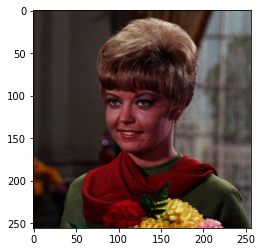

In [3]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np
import math

img_f = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/Images/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


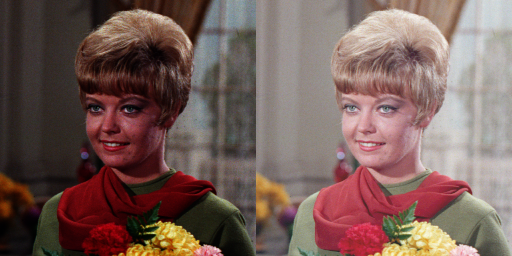

In [4]:
# nomor 1
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth: 3


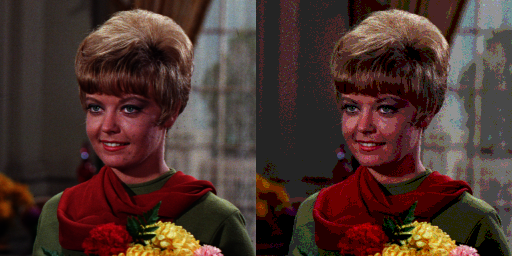

In [5]:
# nomor 2
original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Jumlah Citra :  100
PSNR value :  20.18151664466341


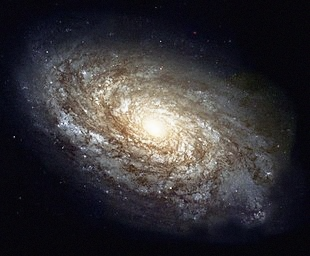

--------------------
Jumlah Citra :  80
PSNR value :  20.432334561852787


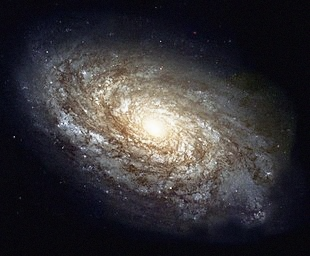

--------------------
Jumlah Citra :  60
PSNR value :  20.67647768040637


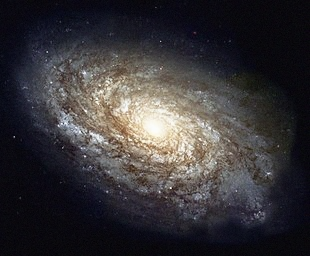

--------------------
Jumlah Citra :  30
PSNR value :  21.028939022374566


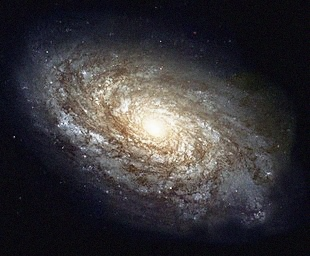

--------------------
Jumlah Citra :  5
PSNR value :  24.131198464651863


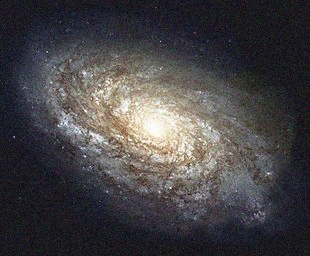

In [ ]:
location="/content/drive/MyDrive/Kuliah/PCVK/Images/noises/*.jpg"
pic=glob.glob(location)
pic.sort()

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): 
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

def img_number(n): 
    temp = cv.imread(pic[0])
    sum_arr = np.zeros(temp.shape)
    for picture in pic[0:n]:
        img = cv.imread(picture)
        sum_arr = sum_arr + img
    denoised_img = sum_arr / n
    output = cv.normalize(denoised_img, None, 0, 255, cv.NORM_MINMAX)
    print('Jumlah Citra : ', n)
    print('PSNR value : ',PSNR(temp, output))
    cv2_imshow(output)

img_number(100)
print('--------------------')
img_number(80)
print('--------------------')
img_number(60)
print('--------------------')
img_number(30)
print('--------------------')
img_number(5)

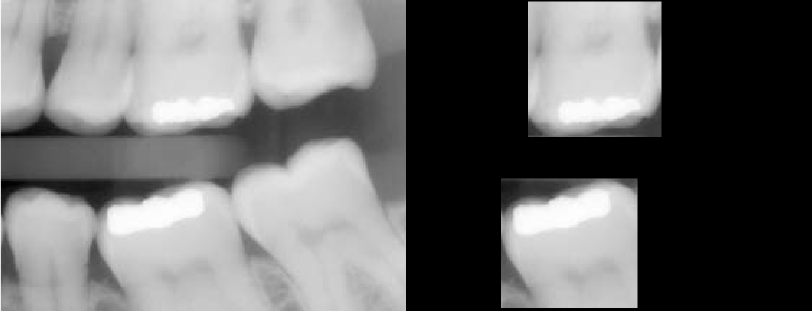

In [36]:
img_t = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/Images/teeth.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_t & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_t & mask1

teeth_frame = cv.hconcat((img_t, result))
masked_img = cv.resize(teeth_frame, (0,0), fx=0.3, fy=0.3) 
cv2_imshow(masked_img)

image input


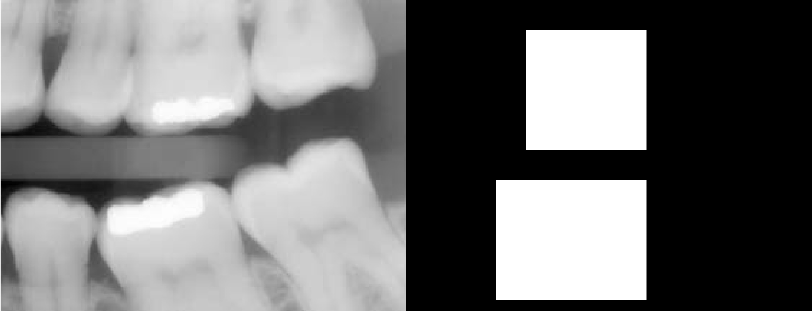

image output:


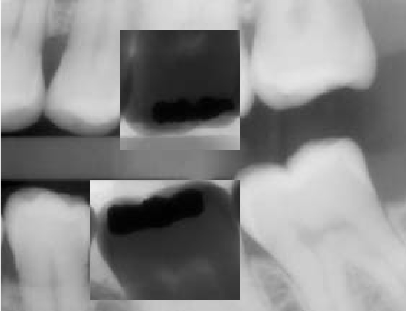

In [37]:
image = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/Images/teeth.jpg')
black = np.zeros(image.shape, image.dtype)
mask = cv.rectangle(black, (400, 100), (800,500), [255,255,255], cv.FILLED)
mask = cv.rectangle(mask, (300, 600), (800,1000), [255,255,255], cv.FILLED)
print('image input')
frame = cv.hconcat((image, mask))
frame = cv.resize(frame, (0,0), fx=0.3, fy=0.3) 
cv2_imshow(frame)
print('image output:')
# masked_img = cv.bitwise_and(image, mask)
# cv2_imshow(masked_img)
# masked_img = cv.bitwise_or(image, mask)
# cv2_imshow(masked_img)
# masked_img = cv.bitwise_not(image, mask)
# cv2_imshow(masked_img)
# masked_img = cv.bitwise_not(cv.bitwise_and(image, mask))
# cv2_imshow(masked_img)
masked_img = cv.bitwise_xor(image, mask)
masked_img = cv.resize(masked_img, (0,0), fx=0.3, fy=0.3) 
cv2_imshow(masked_img)